In [17]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Gouri\Desktop\Proj\New Plant Diseases Dataset(Augmented)\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [18]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Gouri\Desktop\Proj\New Plant Diseases Dataset(Augmented)\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Gouri\Desktop\Proj\New Plant Diseases Dataset(Augmented)\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

## Data processing 

### Training Image Preprocessiong

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 57.25  58.75  79.25]
   [132.75 134.75 157.75]
   [151.5  151.5  179.5 ]
   ...
   [105.5   97.5  120.5 ]
   [133.   125.   148.  ]
   [108.   100.   123.  ]]

  [[ 61.25  62.25  82.75]
   [130.25 132.25 155.25]
   [142.75 142.75 170.75]
   ...
   [114.25 106.25 129.25]
   [114.25 106.25 129.25]
   [108.   100.   123.  ]]

  [[ 61.25  63.25  84.25]
   [115.75 117.75 140.75]
   [147.5  147.5  175.5 ]
   ...
   [134.75 126.75 149.75]
   [134.25 126.25 149.25]
   [132.75 124.75 147.75]]

  ...

  [[ 98.25  95.25 106.25]
   [195.75 191.75 206.75]
   [195.   191.   208.  ]
   ...
   [148.25 142.25 168.25]
   [142.   136.   162.  ]
   [141.25 135.25 161.25]]

  [[ 98.25  95.75 106.25]
   [198.75 194.75 209.75]
   [195.5  191.5  208.5 ]
   ...
   [145.5  139.5  165.5 ]
   [141.25 135.25 161.25]
   [139.75 133.75 159.75]]

  [[ 96.25  94.25 104.25]
   [198.   194.   209.  ]
   [195.   191.   208.  ]
   ...
   [137.   131.   157.  ]
   [134.25 128.25 154.25]
   [135.25 129.25 15

### To avoid Overshooting
1. choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase the number of neurons
3. Add more convolution layer to extract more feature from the images

 ## Building Model

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [31]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [38]:
cnn.add(tf.keras.layers.Flatten())

In [39]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [40]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [41]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling Model

In [42]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

## Model training

In [44]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 5362s 2s/step - loss: 1.3018 - accuracy: 0.6159 - val_loss: 0.5071 - val_accuracy: 0.8372
Epoch 2/10
2197/2197 [==============================] - 5446s 2s/step - loss: 0.4340 - accuracy: 0.8621 - val_loss: 0.2981 - val_accuracy: 0.9052
Epoch 3/10
2197/2197 [==============================] - 5262s 2s/step - loss: 0.2531 - accuracy: 0.9174 - val_loss: 0.1794 - val_accuracy: 0.9421
Epoch 4/10
2197/2197 [==============================] - 6693s 3s/step - loss: 0.1749 - accuracy: 0.9430 - val_loss: 0.1594 - val_accuracy: 0.9470
Epoch 5/10
2197/2197 [==============================] - 6617s 3s/step - loss: 0.1327 - accuracy: 0.9556 - val_loss: 0.1321 - val_accuracy: 0.9571
Epoch 6/10
2197/2197 [==============================] - 33053s 15s/step - loss: 0.1016 - accuracy: 0.9663 - val_loss: 0.1882 - val_accuracy: 0.9406
Epoch 7/10
2197/2197 [==============================] - 5160s 2s/step - loss: 0.0830 - accuracy: 0.9727 - val_loss: 0.14

### model evaluation 

In [45]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1178s 536ms/step - loss: 0.0223 - accuracy: 0.9934
Training accuracy: 0.9933565855026245


In [46]:
print(train_loss, train_acc)

0.022330205887556076 0.9933565855026245


In [47]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)


550/550 [==============================] - 293s 531ms/step - loss: 0.1001 - accuracy: 0.9710


In [48]:
print('Validation accuracy:', val_acc)

Validation accuracy: 0.9710334539413452


## Saving Model

In [49]:
cnn.save('trained_plant_disease_model.keras')

In [51]:
cnn.save('trained model.h5')

C:\Users\Gouri\Desktop\Proj\New Plant Diseases Dataset(Augmented)\tfvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
training_history.history #Return Dictionary of history

{'loss': [1.301756739616394,
  0.43401601910591125,
  0.2531491219997406,
  0.17492374777793884,
  0.13274666666984558,
  0.10162254422903061,
  0.08300173282623291,
  0.07057663053274155,
  0.06334182620048523,
  0.0544721819460392],
 'accuracy': [0.6159186363220215,
  0.8621381521224976,
  0.9174479246139526,
  0.9429831504821777,
  0.9555871486663818,
  0.9663276076316833,
  0.9727434515953064,
  0.9768262505531311,
  0.9799274206161499,
  0.9829432964324951],
 'val_loss': [0.5070626735687256,
  0.2980961799621582,
  0.17936089634895325,
  0.15941449999809265,
  0.13210368156433105,
  0.18819943070411682,
  0.14195023477077484,
  0.11953877657651901,
  0.0919126346707344,
  0.10008332133293152],
 'val_accuracy': [0.8372410535812378,
  0.9052469730377197,
  0.9420669078826904,
  0.9469610452651978,
  0.9571477174758911,
  0.9405872821807861,
  0.956009566783905,
  0.9644320607185364,
  0.9718301892280579,
  0.9710334539413452]}

In [52]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

In [53]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


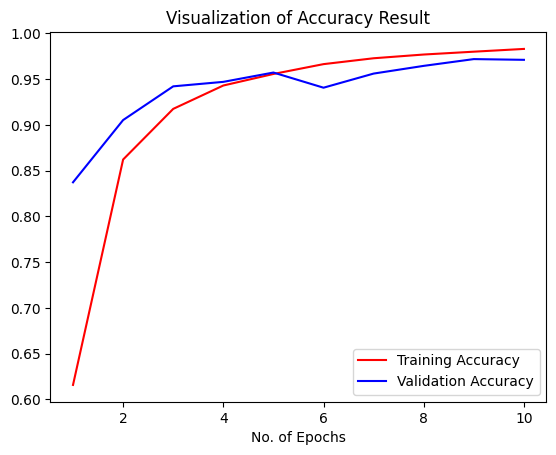

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some Other matrix for model evaluation

In [55]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = cnn.predict(test_set)

17572/17572 [==============================] - 633s 36ms/step


In [62]:
y_pred, y_pred.shape

(array([[9.9999833e-01, 3.4740769e-12, 1.1923607e-13, ..., 1.4583059e-16,
         3.1453728e-17, 2.3394167e-15],
        [9.9979752e-01, 3.6622003e-09, 1.7008380e-09, ..., 2.3909222e-11,
         5.5905961e-12, 3.5311556e-11],
        [1.0000000e+00, 4.1627682e-18, 5.2050190e-16, ..., 4.7381975e-22,
         9.0297475e-21, 2.9811212e-17],
        ...,
        [7.5659382e-11, 1.3095951e-14, 1.9457120e-11, ..., 2.2133905e-13,
         3.1547673e-13, 9.9999928e-01],
        [4.2074752e-10, 1.3094407e-13, 6.5962171e-12, ..., 1.1798935e-10,
         5.0067339e-11, 9.9999917e-01],
        [9.4100021e-13, 3.6085490e-13, 8.0569770e-12, ..., 3.1018482e-12,
         1.5817980e-10, 9.9995661e-01]], dtype=float32),
 (17572, 38))

In [63]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [64]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [65]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [66]:
Y_true = tf.argmax(true_categories, axis=1)

In [67]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Gouri\Desktop\Proj\New Plant Diseases Dataset(Augmented)\tfvenv\Scripts\python.exe -m pip install --upgrade pip


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.95      0.95       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.87      1.00      0.93       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

In [78]:
cm = confusion_matrix(Y_true,predicted_categories)

cm

array([[478,   0,   0, ...,   0,   0,   0],
       [ 12, 472,   0, ...,   0,   0,   0],
       [  0,   0, 429, ...,   0,   0,   1],
       ...,
       [  0,   0,   1, ..., 477,   0,   0],
       [  1,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 469]], dtype=int64)

In [79]:
cm.shape

(38, 38)

## Confusion Matrix Visualization

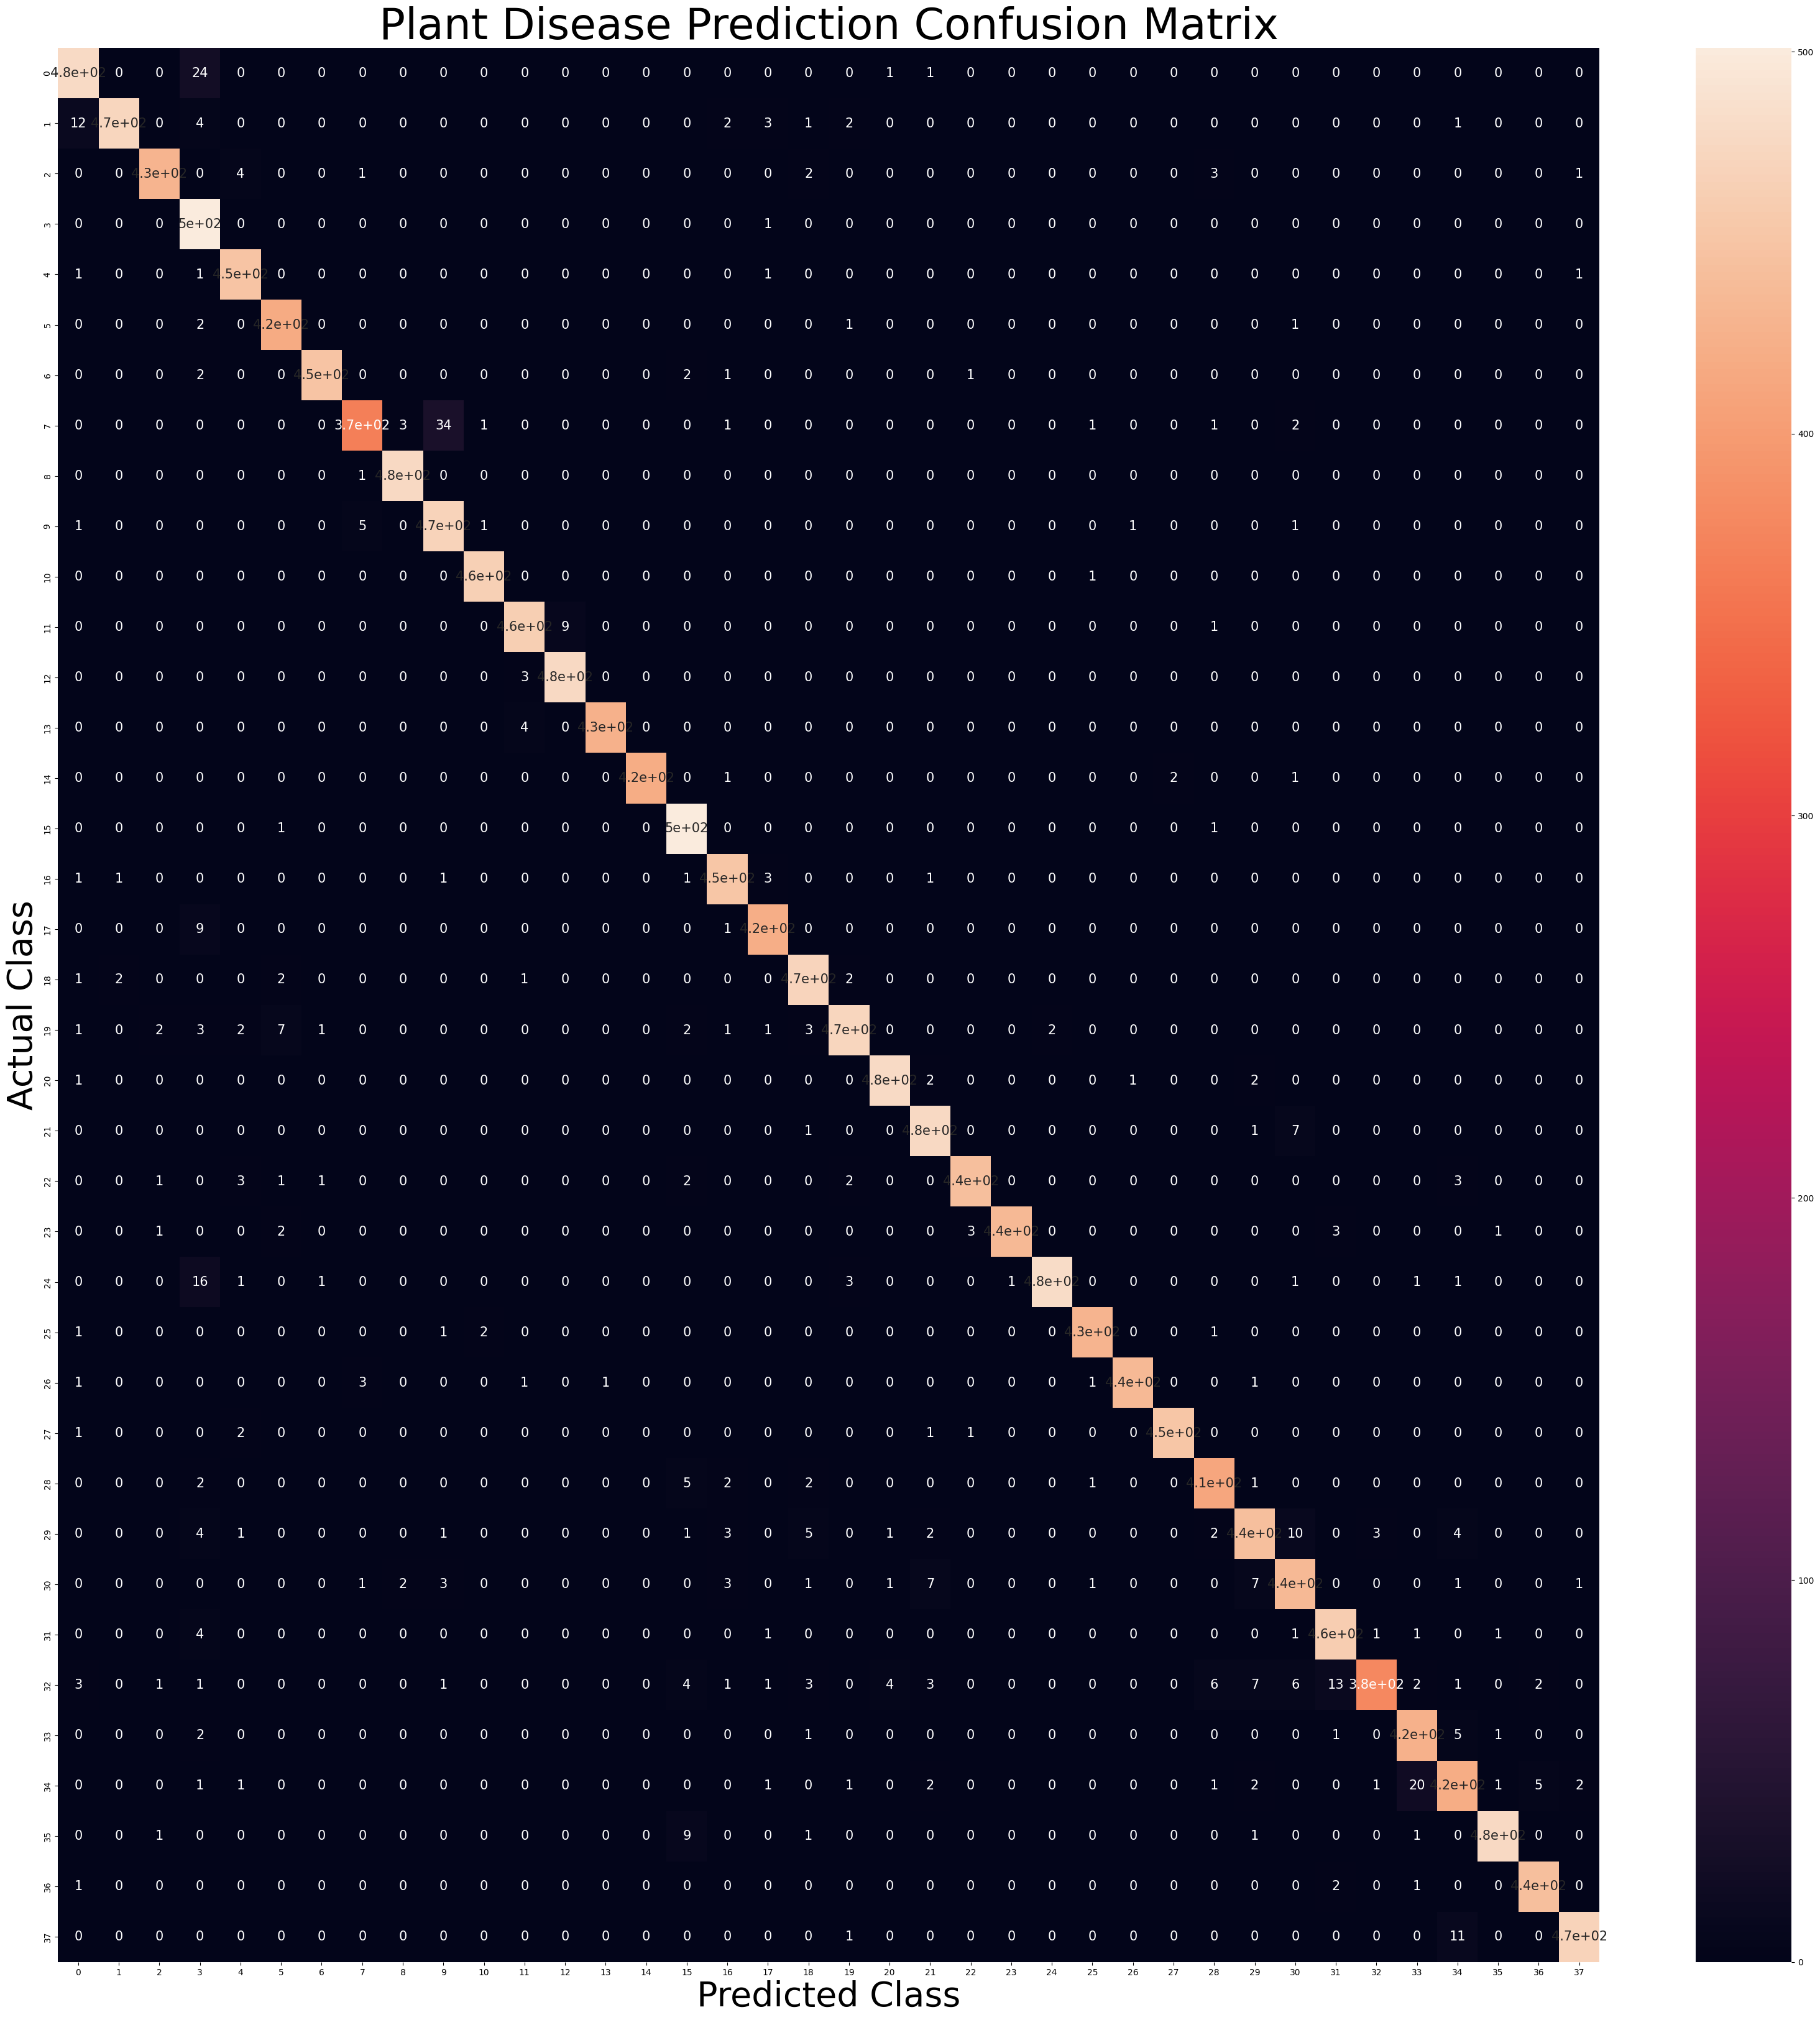

In [82]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 15})

plt.xlabel('Predicted Class',fontsize = 40)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 50)
plt.show()